In [103]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [104]:
df=pd.read_csv("big4_financial_risk_compliance.csv")

In [105]:
df.head()

,Year,Firm_Name,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Industry_Affected,Total_Revenue_Impact,AI_Used_for_Auditing,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
0,2020,PwC,2829,51,123,39,Healthcare,114.24,No,57,5.8,8.4
1,2022,Deloitte,3589,185,30,60,Healthcare,156.98,Yes,58,5.3,6.7
2,2020,PwC,2438,212,124,97,Healthcare,131.83,No,76,6.1,6.2
3,2021,PwC,2646,397,55,97,Healthcare,229.11,No,60,5.1,8.6
4,2020,PwC,2680,216,99,46,Healthcare,48.00,No,51,9.1,6.7


In [106]:
df.shape

(100, 12)

In [107]:
df.columns

Index(['Year', 'Firm_Name', 'Total_Audit_Engagements', 'High_Risk_Cases',
       'Compliance_Violations', 'Fraud_Cases_Detected', 'Industry_Affected',
       'Total_Revenue_Impact', 'AI_Used_for_Auditing', 'Employee_Workload',
       'Audit_Effectiveness_Score', 'Client_Satisfaction_Score'],
      dtype='object')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       100 non-null    int64  
 1   Firm_Name                  100 non-null    object 
 2   Total_Audit_Engagements    100 non-null    int64  
 3   High_Risk_Cases            100 non-null    int64  
 4   Compliance_Violations      100 non-null    int64  
 5   Fraud_Cases_Detected       100 non-null    int64  
 6   Industry_Affected          100 non-null    object 
 7   Total_Revenue_Impact       100 non-null    float64
 8   AI_Used_for_Auditing       100 non-null    object 
 9   Employee_Workload          100 non-null    int64  
 10  Audit_Effectiveness_Score  100 non-null    float64
 11  Client_Satisfaction_Score  100 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 9.5+ KB


In [109]:
df.describe()

,Year,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Total_Revenue_Impact,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2022.320000,2784.520000,277.730000,105.480000,52.700000,272.539000,60.250000,7.490000,7.339000
std,1.780251,1281.863073,135.735174,55.370101,28.311221,139.151401,11.163048,1.516209,1.429127
min,2020.000000,603.000000,51.000000,10.000000,5.000000,33.460000,40.000000,5.000000,5.000000
25%,2021.000000,1768.250000,162.500000,54.500000,27.000000,155.217500,52.750000,6.100000,6.100000
50%,2022.000000,2650.000000,293.000000,114.500000,54.000000,264.450000,60.000000,7.450000,7.350000
75%,2024.000000,4008.750000,395.500000,149.500000,74.500000,406.090000,68.000000,8.825000,8.525000
max,2025.000000,4946.000000,500.000000,200.000000,100.000000,497.060000,80.000000,10.000000,10.000000


In [110]:
df.isnull().sum()

Year                         0
Firm_Name                    0
Total_Audit_Engagements      0
High_Risk_Cases              0
Compliance_Violations        0
Fraud_Cases_Detected         0
Industry_Affected            0
Total_Revenue_Impact         0
AI_Used_for_Auditing         0
Employee_Workload            0
Audit_Effectiveness_Score    0
Client_Satisfaction_Score    0
dtype: int64

In [111]:
df['Year'].unique()

array([2020, 2022, 2021, 2023, 2024, 2025], dtype=int64)

In [112]:
#Which firm had the highest number of high-risk cases across all years?
high_risk=df.groupby('Firm_Name')['High_Risk_Cases'].sum().sort_values(ascending=False)
print(high_risk)

Firm_Name
Deloitte         8485
KPMG             6869
Ernst & Young    6403
PwC              6016
Name: High_Risk_Cases, dtype: int64


In [113]:
df.groupby('Firm_Name')['High_Risk_Cases'].sum().sort_values(ascending=False).head(1)

Firm_Name
Deloitte    8485
Name: High_Risk_Cases, dtype: int64

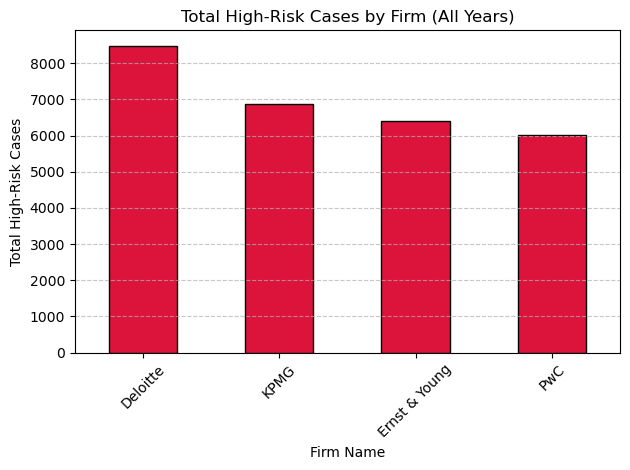

In [114]:

high_risk.plot(kind='bar', color='crimson', edgecolor='black')
plt.title('Total High-Risk Cases by Firm (All Years)')
plt.xlabel('Firm Name')
plt.ylabel('Total High-Risk Cases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [115]:
#How many fraud cases were detected per firm per year?
fraud_cases=df.groupby('Year')['Fraud_Cases_Detected'].sum()
print(fraud_cases)

Year
2020    1042
2021     963
2022     667
2023     727
2024     938
2025     933
Name: Fraud_Cases_Detected, dtype: int64


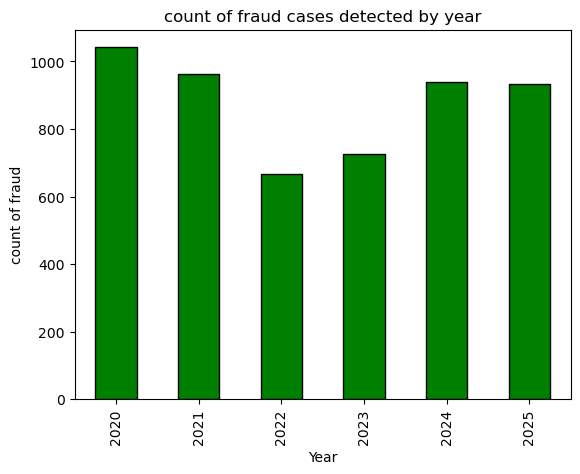

In [116]:
fraud_cases.plot(kind='bar',color='green', edgecolor='black')
plt.title('count of fraud cases detected by year')
plt.xlabel('Year')
plt.ylabel('count of fraud')
plt.show()

2020 year has the highest fraud cases .

In [117]:
df.columns

Index(['Year', 'Firm_Name', 'Total_Audit_Engagements', 'High_Risk_Cases',
       'Compliance_Violations', 'Fraud_Cases_Detected', 'Industry_Affected',
       'Total_Revenue_Impact', 'AI_Used_for_Auditing', 'Employee_Workload',
       'Audit_Effectiveness_Score', 'Client_Satisfaction_Score'],
      dtype='object')

In [118]:
#What is the trend of compliance violations over the years for each firm
compliance_trend = df.groupby(['Year', 'Firm_Name'])['Compliance_Violations'].sum().reset_index()


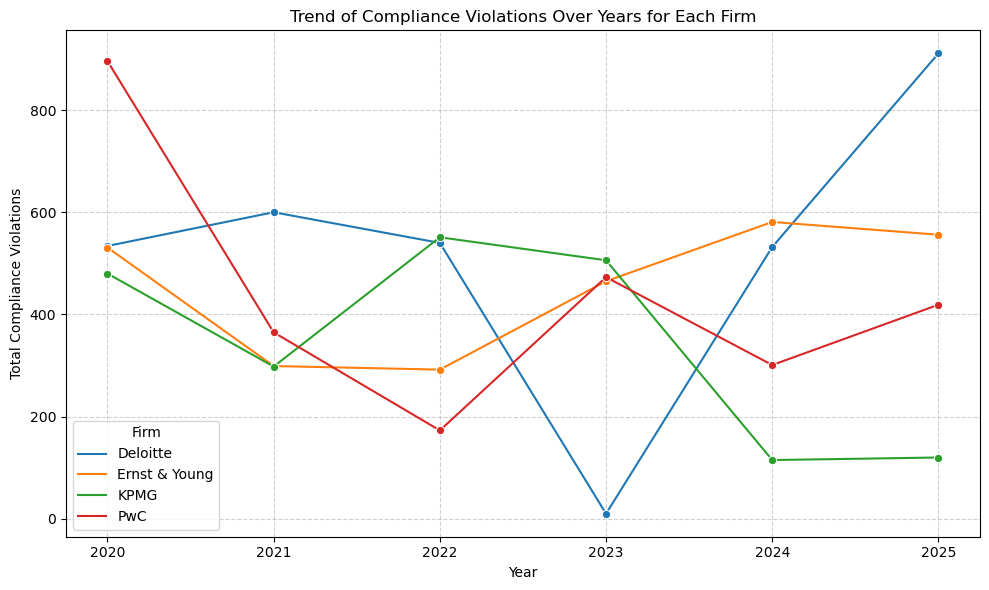

In [119]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=compliance_trend, x='Year', y='Compliance_Violations', hue='Firm_Name', marker='o')

plt.title('Trend of Compliance Violations Over Years for Each Firm')
plt.xlabel('Year')
plt.ylabel('Total Compliance Violations')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Firm')
plt.tight_layout()
plt.show()

from 2023 the compliencw violations of KPMG is been low ,that shows KPMG is committed to sustained improvement and strong internal control

In [120]:
#Does the use of AI improve audit effectiveness score?
df.groupby('AI_Used_for_Auditing')['Audit_Effectiveness_Score'].mean()

AI_Used_for_Auditing
No     7.403636
Yes    7.595556
Name: Audit_Effectiveness_Score, dtype: float64

use of ai can improve audit effectiveness 

In [121]:
#Which industry shows the highest number of compliance issues?
df.groupby('Firm_Name')['Compliance_Violations'].sum().sort_values(ascending=False)

Firm_Name
Deloitte         3127
Ernst & Young    2724
PwC              2627
KPMG             2070
Name: Compliance_Violations, dtype: int64

In [122]:
#Is there a correlation between employee workload and client satisfaction?
df['Employee_Workload'].corr(df['Client_Satisfaction_Score'])

0.034332929230162956

based on the dataset there is no correlation between employee workload and client satisfaction score .I personally believe quality of work matters.

In [123]:
#How does total revenue impact correlate with the number of fraud cases?
df['Total_Revenue_Impact'].corr(df['Fraud_Cases_Detected'])

0.012651049770818894

In [124]:
#Which firms show consistent performance in audit effectiveness scores over time?
consistency = df.groupby('Firm_Name')['Audit_Effectiveness_Score'].std().sort_values()
print(consistency)

Firm_Name
PwC              1.505246
KPMG             1.517353
Ernst & Young    1.517721
Deloitte         1.593608
Name: Audit_Effectiveness_Score, dtype: float64


PwC shows the consistent performance in audit performance score over time .

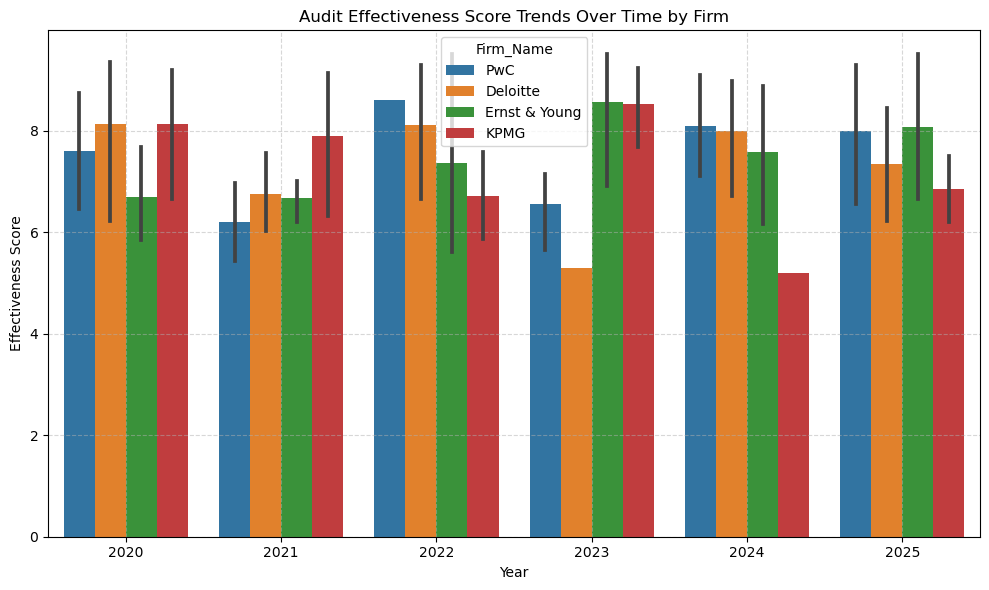

In [125]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Year', y='Audit_Effectiveness_Score', hue='Firm_Name')
plt.title('Audit Effectiveness Score Trends Over Time by Firm')
plt.xlabel('Year')
plt.ylabel('Effectiveness Score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [126]:
#Do firms using AI have lower fraud detection but higher client satisfaction?
fraud_comparison = df.groupby('AI_Used_for_Auditing')['Fraud_Cases_Detected'].mean()
print(fraud_comparison)


AI_Used_for_Auditing
No     54.727273
Yes    50.222222
Name: Fraud_Cases_Detected, dtype: float64


In [127]:
satisfaction_comparison = df.groupby('AI_Used_for_Auditing')['Client_Satisfaction_Score'].mean()
print(satisfaction_comparison)

AI_Used_for_Auditing
No     7.316364
Yes    7.366667
Name: Client_Satisfaction_Score, dtype: float64


In [128]:
summary = df.groupby('AI_Used_for_Auditing')[['Fraud_Cases_Detected', 'Client_Satisfaction_Score']].mean()
print(summary)


                      Fraud_Cases_Detected  Client_Satisfaction_Score
AI_Used_for_Auditing                                                 
No                               54.727273                   7.316364
Yes                              50.222222                   7.366667


from this we can say that firms that are using ai they have less fraud case detected and their customer satisfaction score is also more then the firm that are not using ai 

In [ ]:
#Which firm manages to balance high audit engagements with low compliance violations over time?
firm_stats = df.groupby('Firm_Name')[['Audit_Effectiveness_Score', 'Compliance_Violations']].sum()
print(firm_stats)

In [ ]:
firm_stats['Engagements_per_Violation'] = firm_stats['Audit_Effectiveness_Score'] / firm_stats['Compliance_Violations']
firm_stats_sorted = firm_stats.sort_values(by='Engagements_per_Violation', ascending=False)
print(firm_stats_sorted)


KPMG balances it very well .

In [129]:
benchmark_df = df.groupby(['Firm_Name', 'Year', 'Industry_Affected']).agg({
    'Audit_Effectiveness_Score': 'mean',
    'Compliance_Violations': 'sum'
}).reset_index()


In [130]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

benchmark_df['Effectiveness_scaled'] = scaler.fit_transform(benchmark_df[['Audit_Effectiveness_Score']])
benchmark_df['Violations_scaled'] = scaler.fit_transform(benchmark_df[['Compliance_Violations']])

# Higher effectiveness, lower violations → higher benchmark score
benchmark_df['Benchmark_Score'] = benchmark_df['Effectiveness_scaled'] + (1 - benchmark_df['Violations_scaled'])


In [131]:
best_combo = benchmark_df.sort_values(by='Benchmark_Score', ascending=False).head(1)
print(best_combo)


   Firm_Name  Year Industry_Affected  Audit_Effectiveness_Score  \
46       PwC  2020            Retail                       10.0   

    Compliance_Violations  Effectiveness_scaled  Violations_scaled  \
46                     48                   1.0           0.077236   

    Benchmark_Score  
46         1.922764  


In [66]:
#Use regression to predict revenue impact from workload, risk cases, and AI usage.
df['AI_Used_for_Auditing']=df['AI_Used_for_Auditing'].map({
    'Yes':'1',
    'No':'0'
})

In [67]:
df.head()

,Year,Firm_Name,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Industry_Affected,Total_Revenue_Impact,AI_Used_for_Auditing,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
0,2020,PwC,2829,51,123,39,Healthcare,114.24,0,57,5.8,8.4
1,2022,Deloitte,3589,185,30,60,Healthcare,156.98,1,58,5.3,6.7
2,2020,PwC,2438,212,124,97,Healthcare,131.83,0,76,6.1,6.2
3,2021,PwC,2646,397,55,97,Healthcare,229.11,0,60,5.1,8.6
4,2020,PwC,2680,216,99,46,Healthcare,48.00,0,51,9.1,6.7


,Year,Firm_Name,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Industry_Affected,Total_Revenue_Impact,AI_Used_for_Auditing,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
0,2020,1.0,2829,51,123,39,1,114.24,0,57,5.8,8.4
1,2022,2.0,3589,185,30,60,1,156.98,1,58,5.3,6.7
2,2020,1.0,2438,212,124,97,1,131.83,0,76,6.1,6.2
3,2021,1.0,2646,397,55,97,1,229.11,0,60,5.1,8.6
4,2020,1.0,2680,216,99,46,1,48.00,0,51,9.1,6.7


In [75]:
X = df[['Employee_Workload', 'High_Risk_Cases', 'AI_Used_for_Auditing']]
y = df['Total_Revenue_Impact']

In [76]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [77]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)
print(f"Intercept: {model.intercept_}")

                Feature  Coefficient
0     Employee_Workload    -0.205511
1       High_Risk_Cases    -0.010157
2  AI_Used_for_Auditing   -45.847794
Intercept: 308.37352157139003


In [78]:
from sklearn.metrics import r2_score

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"R² Score: {r2:.3f}")

R² Score: 0.027


In [80]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X, y)

y_pred_rf = model_rf.predict(X)
print("R² (Random Forest):", r2_score(y, y_pred_rf))

R² (Random Forest): 0.8193426390896867
